<a href="https://colab.research.google.com/github/adiakite002/skills-introduction-to-github/blob/main/Analyse%20de%20l'%C3%A9volustion%20de%20la%20densit%C3%A9%20urbaine%20en%20Afrique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANALYSE DE L'ÉVOLUTION DE LA DYNAMIQUE DE LA DENSITÉ URBAINE EN AFRIQUE DE 1950 À 2050**

DIAKITE ABDOULAYE, ÉCONOMISTE-DATA ANALYST

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
import plotly.express as px
#import pandas as pd

#import matplotlib.pyplot as plt
#import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
data=pd.read_excel('sample_data/Africapolis_country_2024_written_test (1).xlsx', sheet_name="Feuil1")

In [4]:
 # Identifions les colonnes Upop et ADBA séparément avant transformation
upop_columns = [col for col in data.columns if col.startswith('Upop')]
adba_columns = [col for col in data.columns if col.startswith('ADBA')]
Usurf_columns = [col for col in data.columns if col.startswith('Usurf')]

# Transformation melt pour Upop afin d'avoir un bon format de la base
upop_melted = data.melt(id_vars=["ISO", "Country", "AU_Regions", "Area"],
                        value_vars=upop_columns,
                        var_name="Year",
                        value_name="Upop")

# Transformation melt pour Usurf
adba_melted = data.melt(id_vars=["ISO", "Country", "AU_Regions", "Area"],
                        value_vars=adba_columns,
                        var_name="Year",
                        value_name="Usurf")

# Ensuite nous devons convertir "Year" en format numérique et supprimer le préfixe
upop_melted['Year'] = upop_melted['Year'].str.extract('(\d+)').astype(int)
adba_melted['Year'] = adba_melted['Year'].str.extract('(\d+)').astype(int)

# Fusion des deux DataFrames
data_melted = pd.merge(upop_melted, adba_melted, on=["ISO", "Country", "AU_Regions", "Area", "Year"])
print(data_melted.head())


   ISO       Country       AU_Regions     Area  Year      Upop       Usurf
0  AGO        Angola  Southern Africa  1246700  1950  220300.0  184.800273
1  BDI       Burundi   Central Africa    25680  1950   18954.0    0.000000
2  BEN         Benin      West Africa   112760  1950   89069.0   44.133230
3  BFA  Burkina Faso      West Africa   273600  1950   85196.0  137.478926
4  BWA      Botswana  Southern Africa   566730  1950       0.0    0.000000


In [5]:
data_melted.head(10)

,ISO,Country,AU_Regions,Area,Year,Upop,Usurf
0,AGO,Angola,Southern Africa,1246700,1950,220300.0,184.800273
1,BDI,Burundi,Central Africa,25680,1950,18954.0,0.000000
2,BEN,Benin,West Africa,112760,1950,89069.0,44.133230
3,BFA,Burkina Faso,West Africa,273600,1950,85196.0,137.478926
4,BWA,Botswana,Southern Africa,566730,1950,0.0,0.000000
5,CAF,Central African Republic,Central Africa,622980,1950,37614.0,0.000000
6,CIV,Cote d`Ivoire,West Africa,318000,1950,106761.0,208.685286
7,CMR,Cameroon,Central Africa,472710,1950,299700.0,80.810477
8,COD,Democratic Republic of the Congo,Central Africa,2267050,1950,571478.0,202.732976
9,COG,Republic of the Congo,Central Africa,341500,1950,102400.0,352.599247


In [6]:
data_melted.tail()

,ISO,Country,AU_Regions,Area,Year,Upop,Usurf
1030,CEEAC,Economic Community of Central African States,Regional entities,6547170,2050,2.623461e+08,28.951774
1031,CEDEAO,Economic Community of West African States,Regional entities,5032970,2050,4.363054e+08,13.151923
1032,IGAD,Intergovernmental Authority on Development,Regional entities,4925993,2050,2.643598e+08,19.487090
1033,CDAA,Southern African Development Community,Regional entities,9652319,2050,3.658737e+08,21.425438
1034,UEMOA,West African Economic and Monetary Union,Regional entities,3466290,2050,1.297809e+08,15.409936


In [7]:
# Après avoir constaté que les données pour Usurf ne sont disponibles qu'a partir
# de 2015, nous filtrons les données à partir de cette date pour une meilleure analyse
data_melted_filtered = data_melted[data_melted['Year'] >= 2015]

print(data_melted_filtered.head())


     ISO       Country       AU_Regions     Area  Year         Upop      Usurf
483  AGO        Angola  Southern Africa  1246700  2015  15823034.00  52.094348
484  BDI       Burundi   Central Africa    25680  2015   1804627.00  19.597799
485  BEN         Benin      West Africa   112760  2015   4708377.00  16.002091
486  BFA  Burkina Faso      West Africa   273600  2015   5085493.00  30.348331
487  BWA      Botswana  Southern Africa   566730  2015   1168439.01  56.644677


In [8]:
# Calcul de la densité urbaine et ajout de la colonne. Cette variable permet de
#de capter l'évolution de la dynamique de croissance des populations urbaines
#par rapport aux surfaces urbaines construites.

data_melted['Densité_Urbain'] = data_melted['Upop'] / data_melted['Usurf']  # En habitants par km²

In [9]:
print(data_melted.head())

   ISO       Country       AU_Regions     Area  Year      Upop       Usurf  \
0  AGO        Angola  Southern Africa  1246700  1950  220300.0  184.800273   
1  BDI       Burundi   Central Africa    25680  1950   18954.0    0.000000   
2  BEN         Benin      West Africa   112760  1950   89069.0   44.133230   
3  BFA  Burkina Faso      West Africa   273600  1950   85196.0  137.478926   
4  BWA      Botswana  Southern Africa   566730  1950       0.0    0.000000   

   Densité_Urbain  
0     1192.097807  
1             inf  
2     2018.184484  
3      619.702251  
4             NaN  


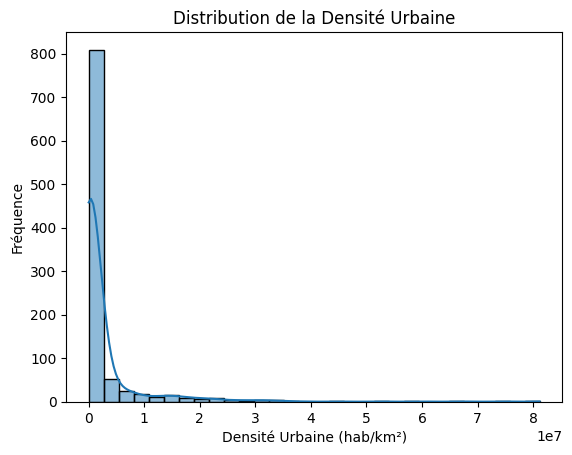

In [10]:
#Nous pouvons continuer l'Analyse Exploratoire des données
# Histogramme de la densité urbaine

sns.histplot(data_melted['Densité_Urbain'], bins=30, kde=True)
plt.title('Distribution de la Densité Urbaine')
plt.xlabel('Densité Urbaine (hab/km²)')
plt.ylabel('Fréquence')
plt.show()

D'après l'histogramme que nous avons réalisé pour visualiser la distribution de la densité urbaine (calculée en divisant la population urbaine par la surface habitée), on peut observer les éléments suivants :

Distribution asymétrique : La distribution est fortement asymétrique vers la droite (skewed right), avec une grande concentration de valeurs dans les densités plus faibles.

Pic prononcé : Il y a un pic très élevé près de zéro, ce qui suggère qu'un grand nombre d'observations ont une densité urbaine relativement faible.

Queue longue : La distribution présente une longue queue vers la droite, s'étendant jusqu'à environ 8 x 10^7 hab/km², ce qui suggère l'existence de quelques zones urbaines extrêmement denses.

Échelle : L'axe des x (densité urbaine) est en notation scientifique, allant de 0 à 8 x 10^7 hab/km².

Fréquence : L'axe des y montre la fréquence des observations, avec un maximum d'environ 800 pour la classe de densité la plus basse.

Classes de densité : L'histogramme est divisé en plusieurs classes de densité, permettant de voir la répartition des observations.

Cette distribution suggère que la majorité des zones urbaines dans notre étude ont une densité relativement faible, tandis qu'un petit nombre de zones sont extrêmement denses. Cela pourrait refléter la réalité de nombreuses régions urbaines en Afrique, où l'on trouve des centres-villes très denses entourés de banlieues et de zones périurbaines moins denses. Cependant nous allons continuer l'analyse exploratoire pour comprendre la base de données et sa structure.



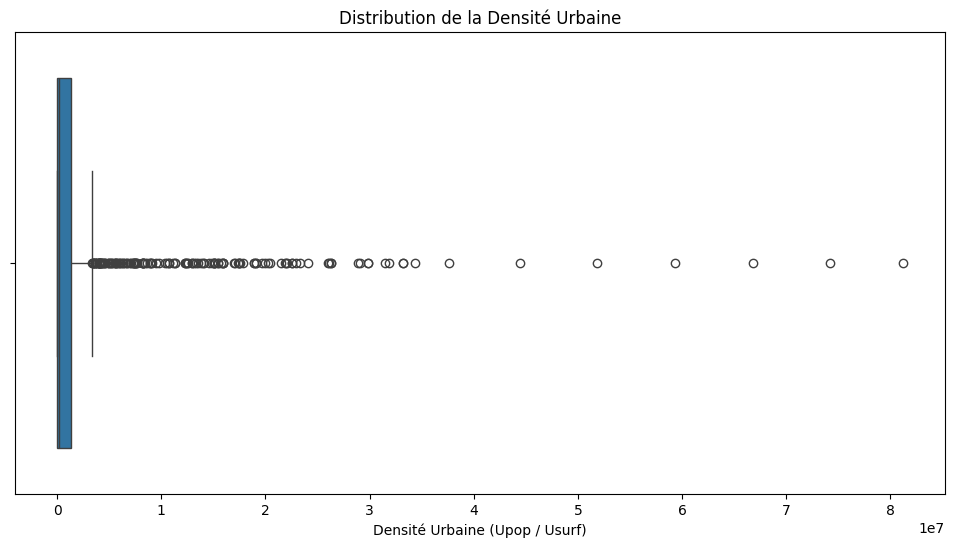

In [11]:
# Création du Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Densité_Urbain', data=data_melted)
plt.title('Distribution de la Densité Urbaine')
plt.xlabel('Densité Urbaine (Upop / Usurf)')
plt.show()


Ce résultat n'étant pas satisfaisant, car la distribution est asymétrique avec une grande variabilité.
 Nous pouvons en déduire qu'il existe des problèmes de données dans la base de donnée. Nous allons faire une transformation logarithmique pour atténuer le problème (réduire le skewwness et et stabiliser la variance) .Cela peut aider à réduire l'asymétrie de la distribution et à mieux visualiser les différences entre les pays.
 Ensuite nous allons désagré les données par régions pour voir la dynamique régionale.

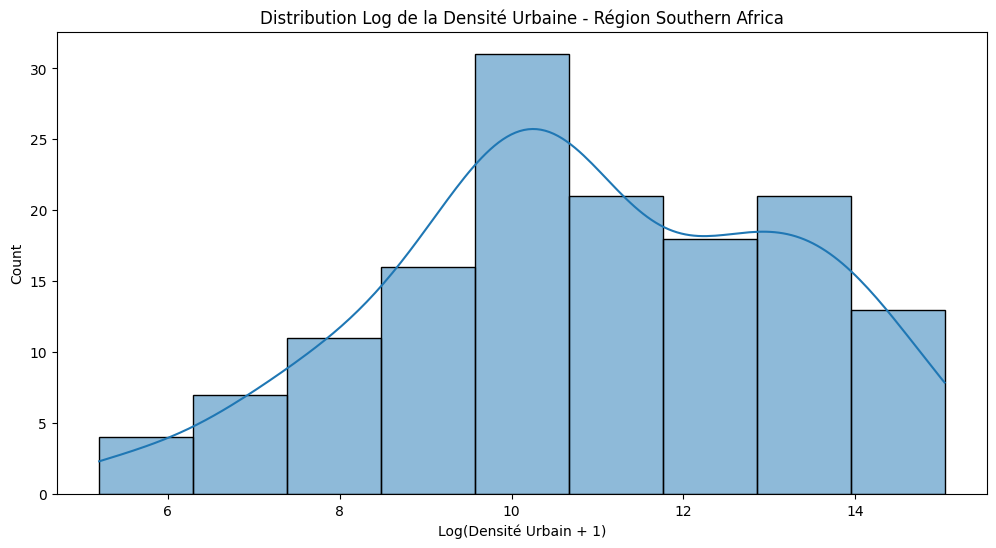

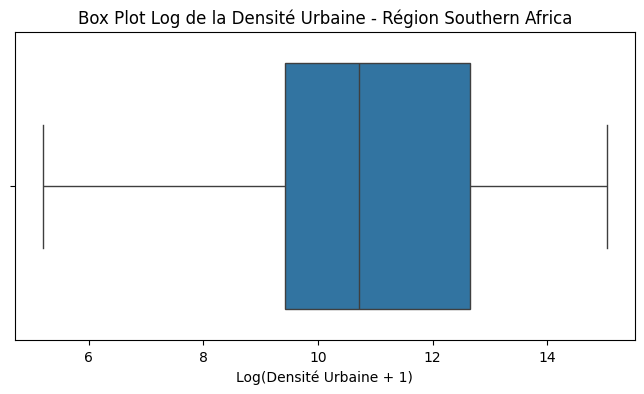

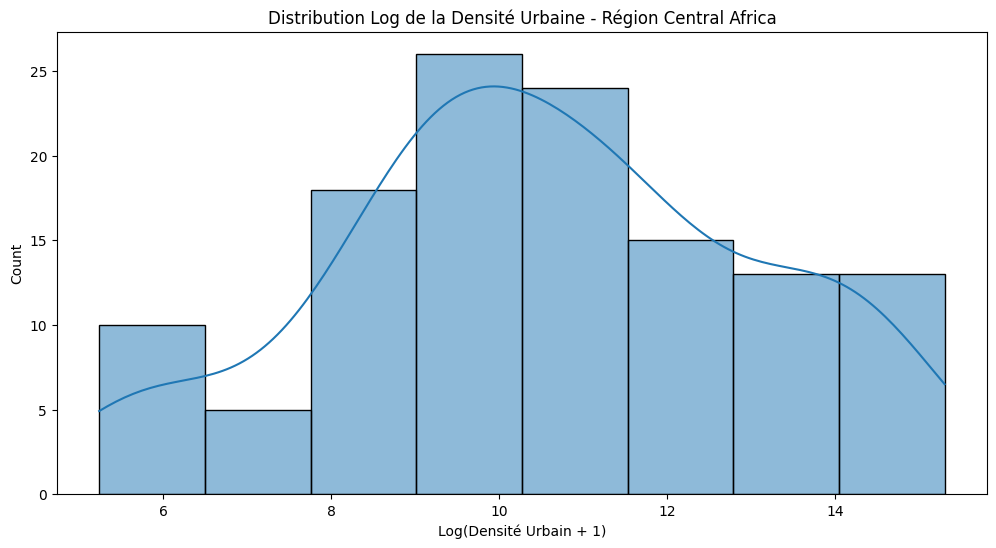

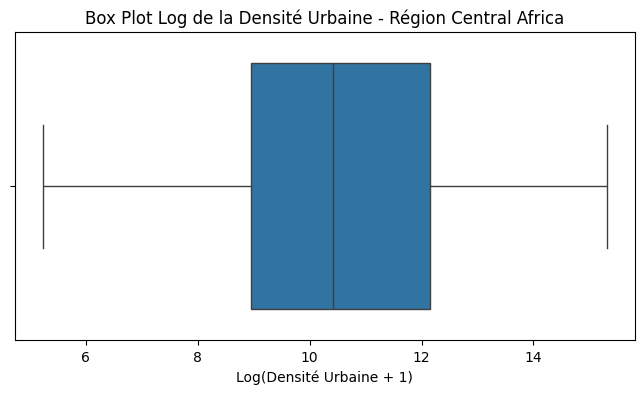

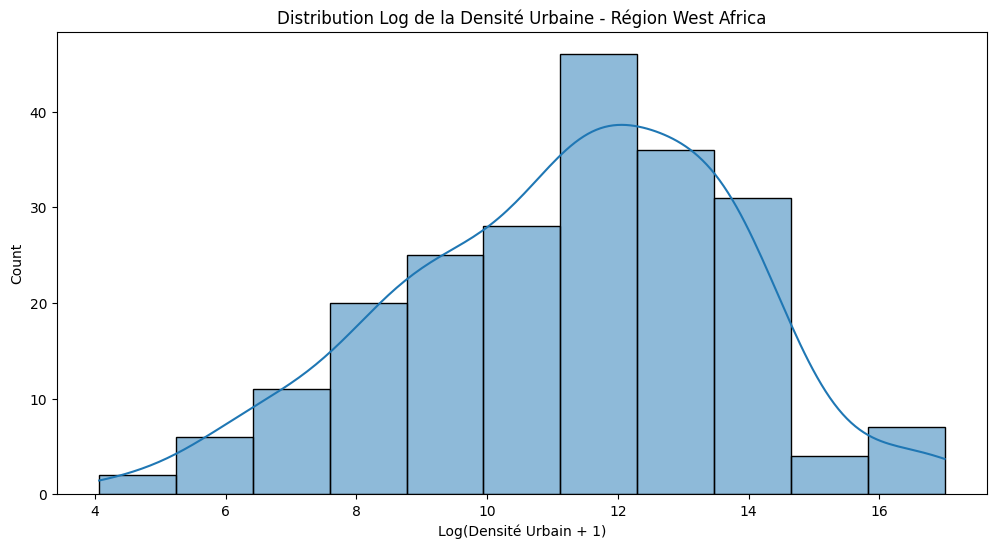

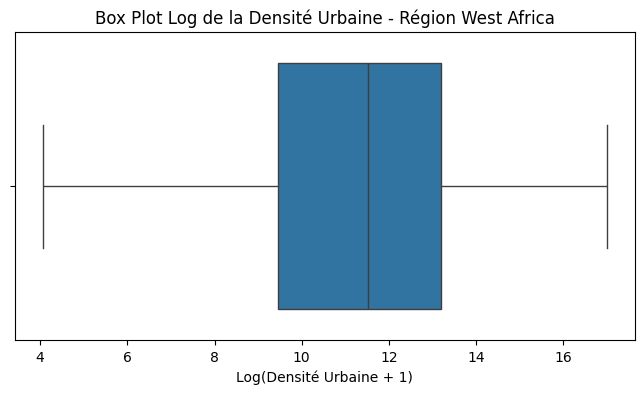

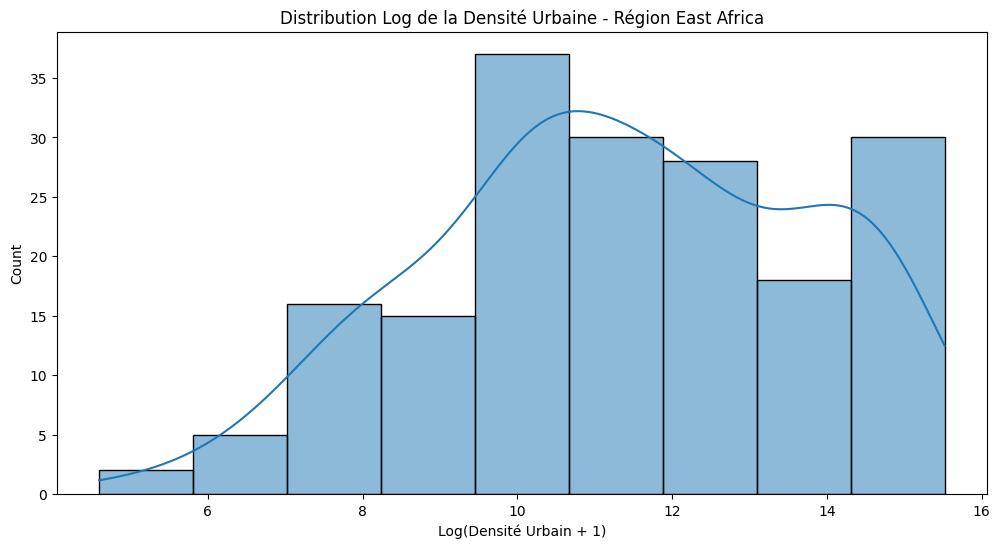

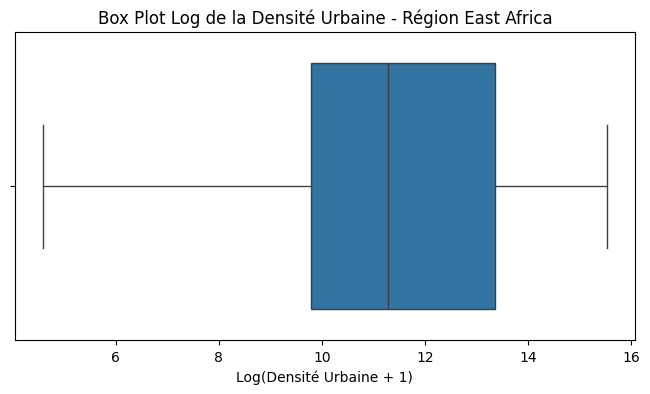

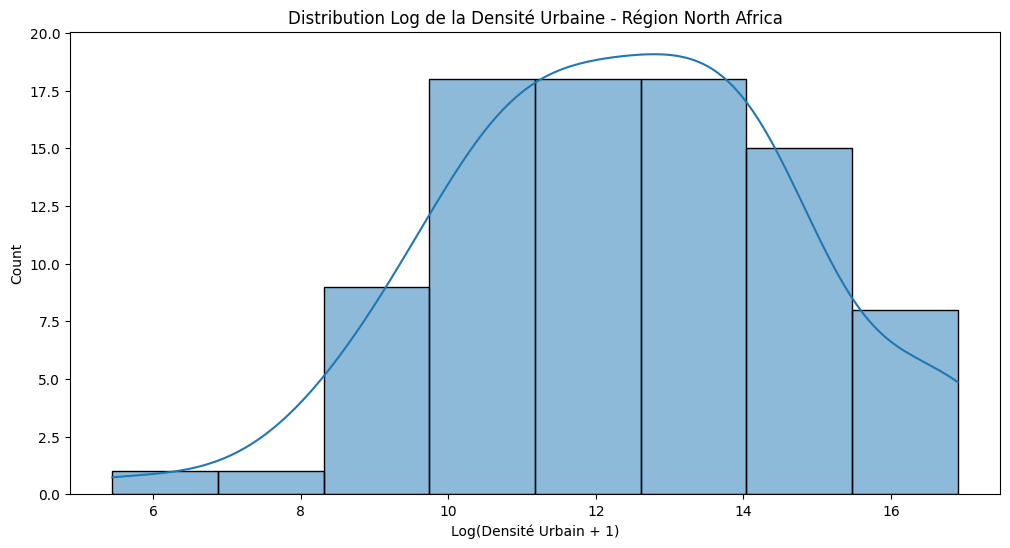

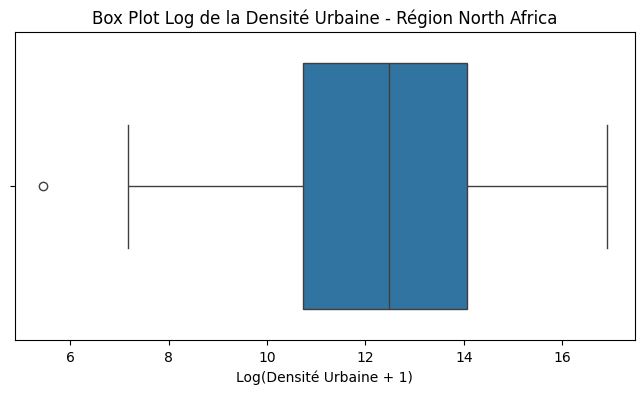

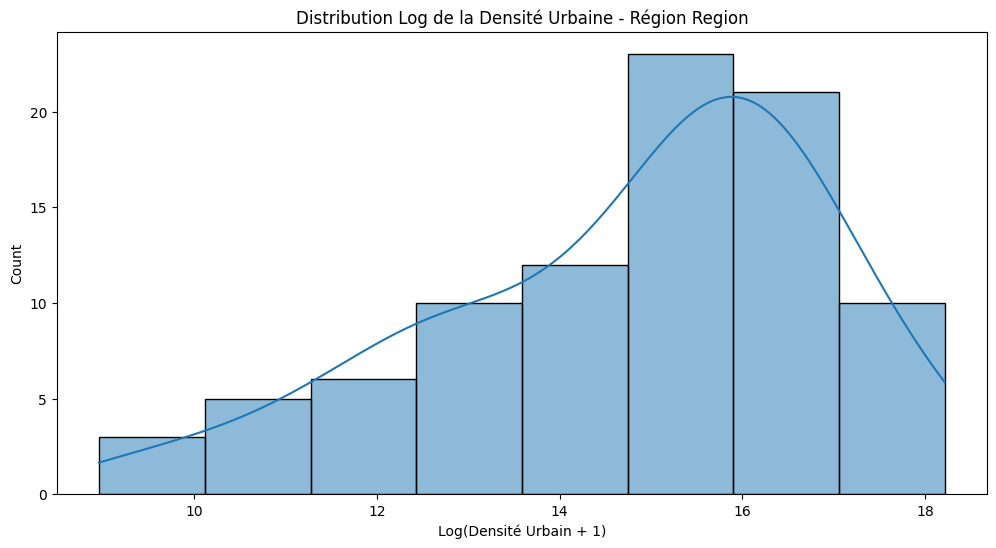

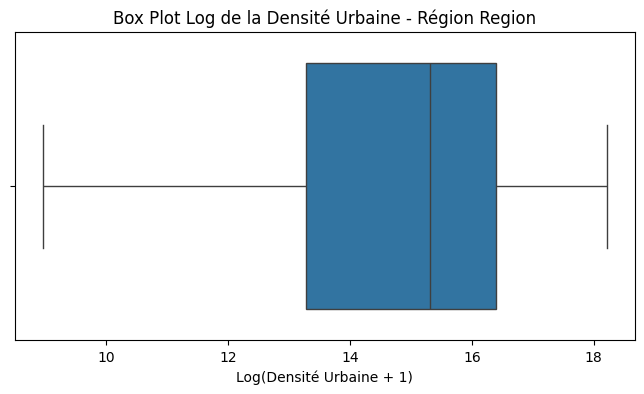

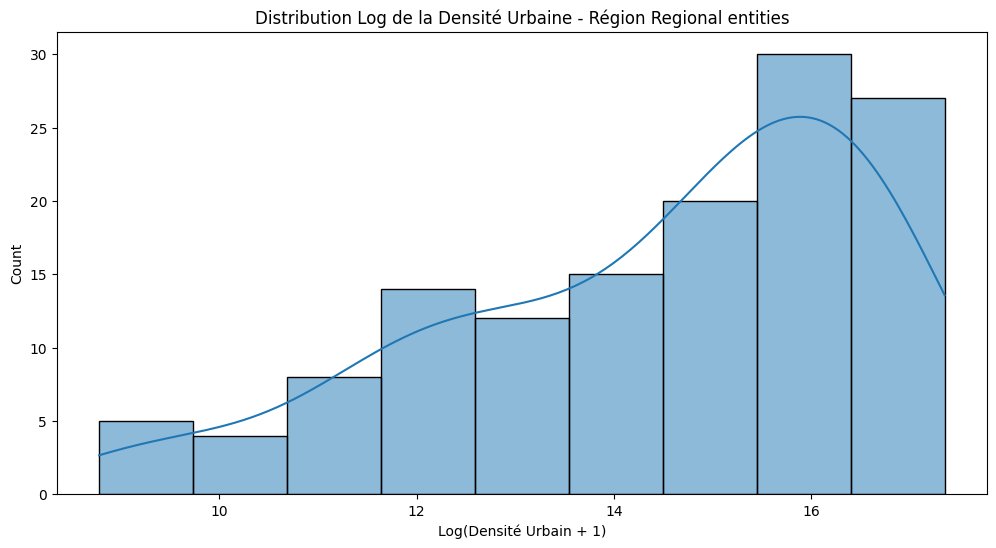

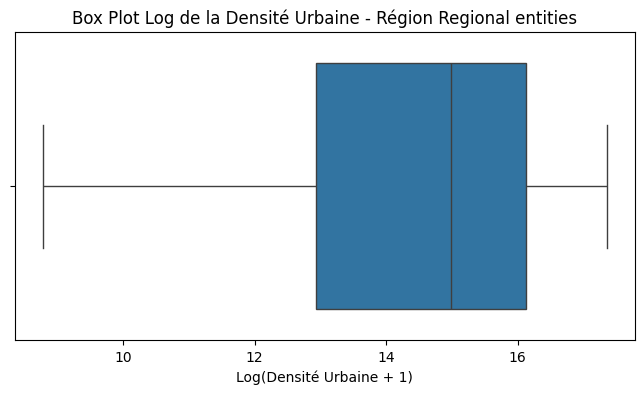

In [12]:
# Transformation logarithmique
data_melted['Log_Densite'] = np.log1p(data_melted['Densité_Urbain'])

# Histogrammes et box plots par région (exemple)
for region in data_melted['AU_Regions'].unique():
    data_region = data_melted[data_melted['AU_Regions'] == region]

    plt.figure(figsize=(12, 6))
    sns.histplot(data_region['Log_Densite'], kde=True)
    plt.title(f'Distribution Log de la Densité Urbaine - Région {region}')
    plt.xlabel('Log(Densité Urbain + 1)')
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data_region['Log_Densite'])
    plt.title(f'Box Plot Log de la Densité Urbaine - Région {region}')
    plt.xlabel('Log(Densité Urbaine + 1)')
    plt.show()


Après avoir vu les histogrammes et box plots séparés par régions, on constate en effet que certaines régions ont une distribution de densité urbaine plus homogène que d'autres. Ce qui permet de faire les analyses suivantes:

**Hétérogénéité régionale:** Les images confirment que l'hétérogénéité de la densité urbaine est plus prononcée au niveau continental qu'au niveau régional. Certaines régions présentent une distribution plus étalée et régulière, tandis que d'autres sont fortement concentrées vers les basses densités avec quelques valeurs extrêmes.

Cette observation renforce l'idée qu'une analyse plus fine au niveau régional est nécessaire pour comprendre les facteurs qui influencent la densité urbaine telles que les politiques d'urbanisation, les caractéristiques géographiques, le niveau de développement économique et d'autres facteurs qui peuvent varier considérablement d'une région à l'autre.

Statistiques Descriptives par Région:
                    count          mean           std          min  \
AU_Regions                                                          
Central Africa     133.0           inf           NaN   186.864202   
East Africa        207.0           inf           NaN    97.918553   
North Africa        88.0  2.090344e+06  5.085196e+06   231.306200   
Region              90.0  1.053258e+07  1.648311e+07  7803.720994   
Regional entities  135.0  7.049102e+06  8.756879e+06  6519.857036   
Southern Africa    145.0           inf           NaN   180.503340   
West Africa        225.0           inf           NaN    57.308034   

                             25%           50%           75%           max  
AU_Regions                                                                  
Central Africa       8352.962948  4.043253e+04  4.515852e+05           inf  
East Africa         23678.154180  1.314266e+05  1.745538e+06           inf  
North Africa        45727.02013

<ipython-input-13-3365ddba52da>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='AU_Regions', y='Densité_Urbain', data=data_melted, palette='viridis') # Vous pouvez changer 'viridis' pour une autre palette


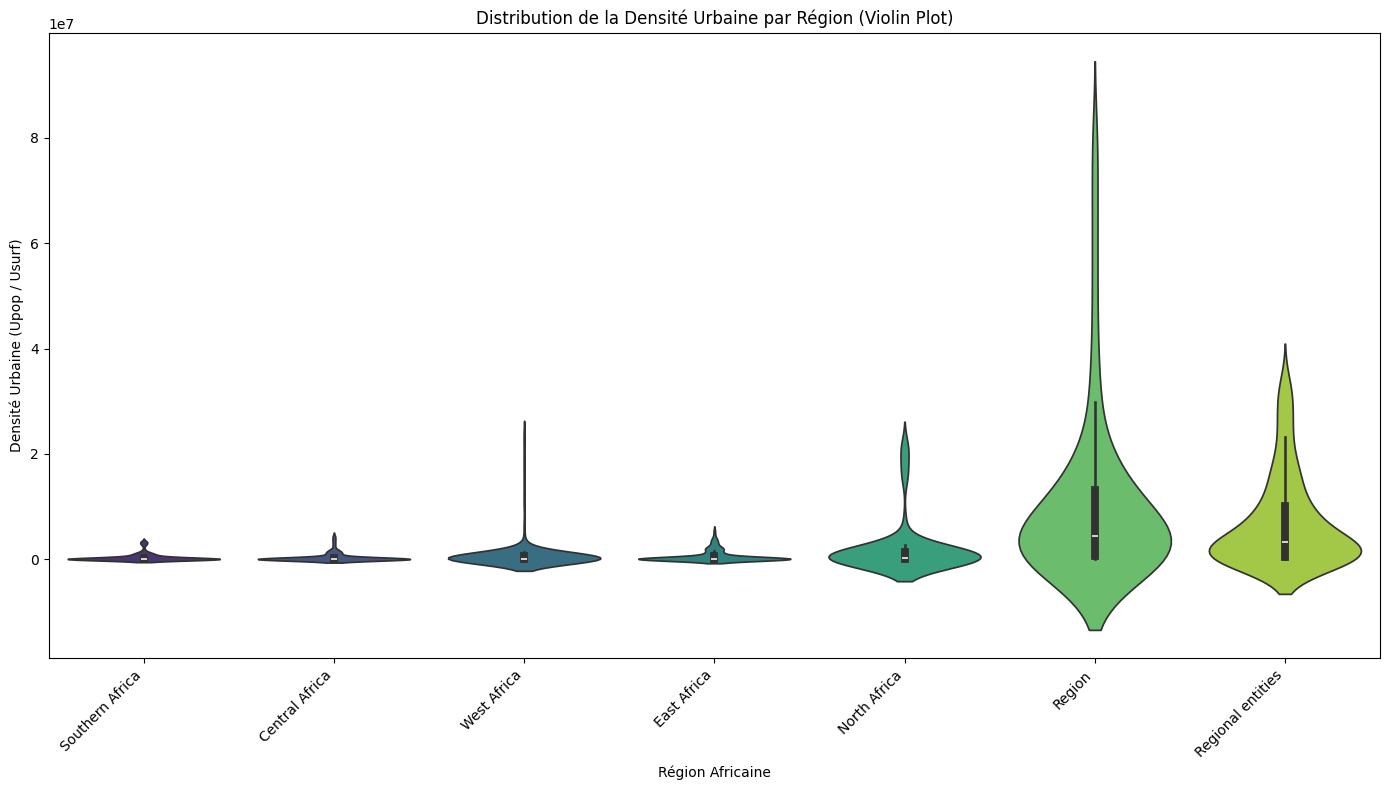

In [13]:
from scipy.stats import kruskal

#Maintenant on peut procéder aux statistiques
# Statistiques descriptives par région
stats_descriptives = data_melted.groupby('AU_Regions')['Densité_Urbain'].describe()
print("Statistiques Descriptives par Région:\n", stats_descriptives)

# Test de Kruskal-Wallis
# Préparation des données pour le test
regions = data_melted['AU_Regions'].unique()
data_par_region = [data_melted['Densité_Urbain'][data_melted['AU_Regions'] == region] for region in regions]

# Exécution du test de Kruskal-Wallis
stat, p = kruskal(*data_par_region)
print("\nTest de Kruskal-Wallis:")
print('Statistic=%.3f, p=%.3f' % (stat, p))

# Hypothèses pour interpréter le résultat
alpha = 0.05
if p > alpha:
    print('Les distributions sont similaires (ne pas rejeter H0)')
else:
    print('Les distributions sont significativement différentes (rejeter H0)')

# Création d'un Violin plot par région pour visualiser la distribution de la densité urbaine dans chaque région.
plt.figure(figsize=(14, 8))
sns.violinplot(x='AU_Regions', y='Densité_Urbain', data=data_melted, palette='viridis') # Vous pouvez changer 'viridis' pour une autre palette
plt.title('Distribution de la Densité Urbaine par Région (Violin Plot)')
plt.xlabel('Région Africaine')
plt.ylabel('Densité Urbaine (Upop / Usurf)')
plt.xticks(rotation=45, ha='right')  # Cette fonction permet d'avoir une meilleure lisibilité des noms de régions
plt.tight_layout()  # Manipulation autom des paramètres de sous-graphiques pour fournir un espacement correct
plt.show()


On constate la présence de données manquates que nous allons traiter.

In [14]:
# Liste des valeurs à considérer comme manquantes
missing_values = ["-", "#"]

# Remplacement des valeurs manquantes par NaN dans l'ensemble de la base de données
data_melted = data_melted.replace(missing_values, np.nan)

print(data.isnull().sum())


ISO           1
Country       0
Country_FR    0
AU_Regions    0
Area          0
             ..
ADBA2030      0
ADBA2035      0
ADBA2040      0
ADBA2045      0
ADBA2050      0
Length: 103, dtype: int64


Nous utilisons l'interpolation linéaire qui suppose que la valeur manquante peut être estimée en traçant une ligne droite entre les deux points de données les plus proches de la valeur manquante.
Cette méthode est préconisée dans notre cas car nous travaillons avec des données de population urbaine (Upop) qui sont collectées annuellement. Il serait donc raisonnable de supposer que la population urbaine évolue de manière relativement continue au fil du temps. En plus nos données sont des series temporelles et cette methode permet de preserver la tendance.

In [15]:
# Imputation des valeurs manquantes dans la colonne 'Upop' par interpolation linéaire
# On utilise groupby('Country') pour effectuer l'interpolation séparément pour chaque pays
# Cela permet de tenir compte des différences de population entre les pays

data_melted['Upop'] = data_melted.groupby('Country')['Upop'].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)
#Dans la fonction Lambda:
#x : représente une série temporelle pour un pays spécifique.
#x.interpolate(method='linear', limit_direction='both') : applique l'interpolation linéaire à cette série temporelle.
#method='linear' : spécifie que l'on utilise l'interpolation linéaire, qui relie les points de données disponibles par des lignes droites pour estimer les valeurs manquantes.
#limit_direction='both' : indique que l'interpolation doit être effectuée dans les deux directions (vers l'avant et vers l'arrière) pour combler les valeurs manquantes au début et à la fin de la série temporelle, si possible.

print(data_melted.isnull().sum())

# Gérer les valeurs manquantes restantes : Supprimer les lignes avec des valeurs manquantes restantes dans la colonne 'Upop'
data_melted = data_melted.dropna(subset=['Upop'])


ISO               15
Country            0
AU_Regions         0
Area               0
Year               0
Upop               0
Usurf              0
Densité_Urbain    12
Log_Densite       12
dtype: int64


Il est possible qu'aprés notre méthode d'imputation, l'ancienne formule de calcul pour la densité urbaine donne zero pour certaines observations donc il est nécessaire de récalculer à nouveau la densité. C'est à dire ces NaN sont probablement dus à des divisions par zéro après l'imputation des valeurs dans Upop.

In [16]:
# Recalculons la densité urbaine après imputation
data_melted['Densité_Urbain'] = data_melted['Upop'] / data_melted['Usurf']

# Puis maintenant nous gérons les valeurs infinies (si elles existent)
data_melted['Densité_Urbain'] = data_melted['Densité_Urbain'].replace([np.inf, -np.inf], np.nan)

# Gestion des valeurs manquantes restantes dans Densite_Urbaine
data_melted = data_melted.dropna(subset=['Densité_Urbain'])

# Appliquer Nous appliquons à nouveau une transformation logarithmique à la colonne 'Densité_Urbain' pour améliorer les visualisations
data_melted['Log_Densite'] = np.log1p(data_melted['Densité_Urbain'])

# Appliquer une transformation logarithmique à la colonne 'Densite_Urbaine' en utilisant .loc
data['Log_Densite'] = np.log1p(data_melted['Densité_Urbain'])


In [17]:
print(data_melted.isnull().sum())

ISO               15
Country            0
AU_Regions         0
Area               0
Year               0
Upop               0
Usurf              0
Densité_Urbain     0
Log_Densite        0
dtype: int64


In [18]:
# Gestion des pays avec des valeurs manquantes dans 'ISO'
pays_avec_manquants_iso = data_melted[data_melted['ISO'].isnull()]['Country'].unique()
print("Pays avec valeurs manquantes dans 'ISO' :", pays_avec_manquants_iso)

# Identifiaction des années avec des valeurs manquantes dans 'ISO'
annees_avec_manquants_iso = data_melted[data_melted['ISO'].isnull()]['Year'].unique()
print("Années avec valeurs manquantes dans 'ISO' :", annees_avec_manquants_iso)


Pays avec valeurs manquantes dans 'ISO' : ['North Africa']
Années avec valeurs manquantes dans 'ISO' : [1950 1960 1970 1980 1990 2000 2010 2015 2020 2025 2030 2035 2040 2045
 2050]


Compte tenu de la nature des codes ISO, la suppression des lignes avec des valeurs manquantes ou l'imputation manuelle ou à l'aide d'une table de correspondance sont les options les plus appropriées. Dans le cadre de cet exercice nous choisions le premier qui est la suppression simple des lignes avec valeurs manquantes

In [19]:
 # Supprimez les lignes avec des valeurs manquantes dans la colonne 'ISO'
data_melted = data_melted.dropna(subset=['ISO'])


In [20]:
print(data_melted.isnull().sum())

ISO               0
Country           0
AU_Regions        0
Area              0
Year              0
Upop              0
Usurf             0
Densité_Urbain    0
Log_Densite       0
dtype: int64


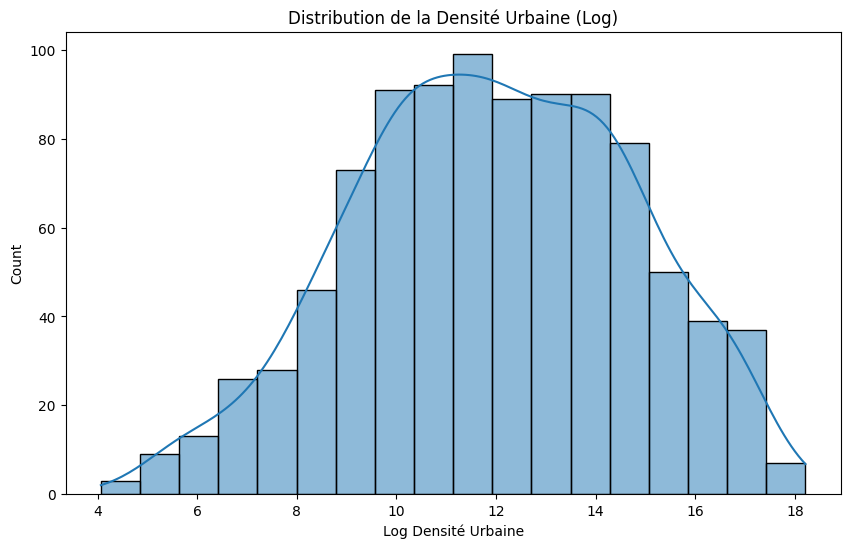

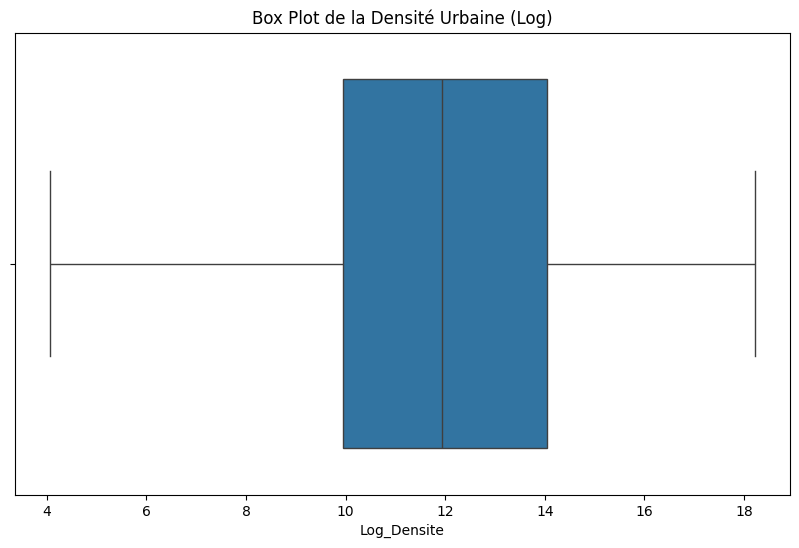

<ipython-input-21-68f78f9ff521>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='AU_Regions', y='Log_Densite', data=data_melted, palette='viridis')


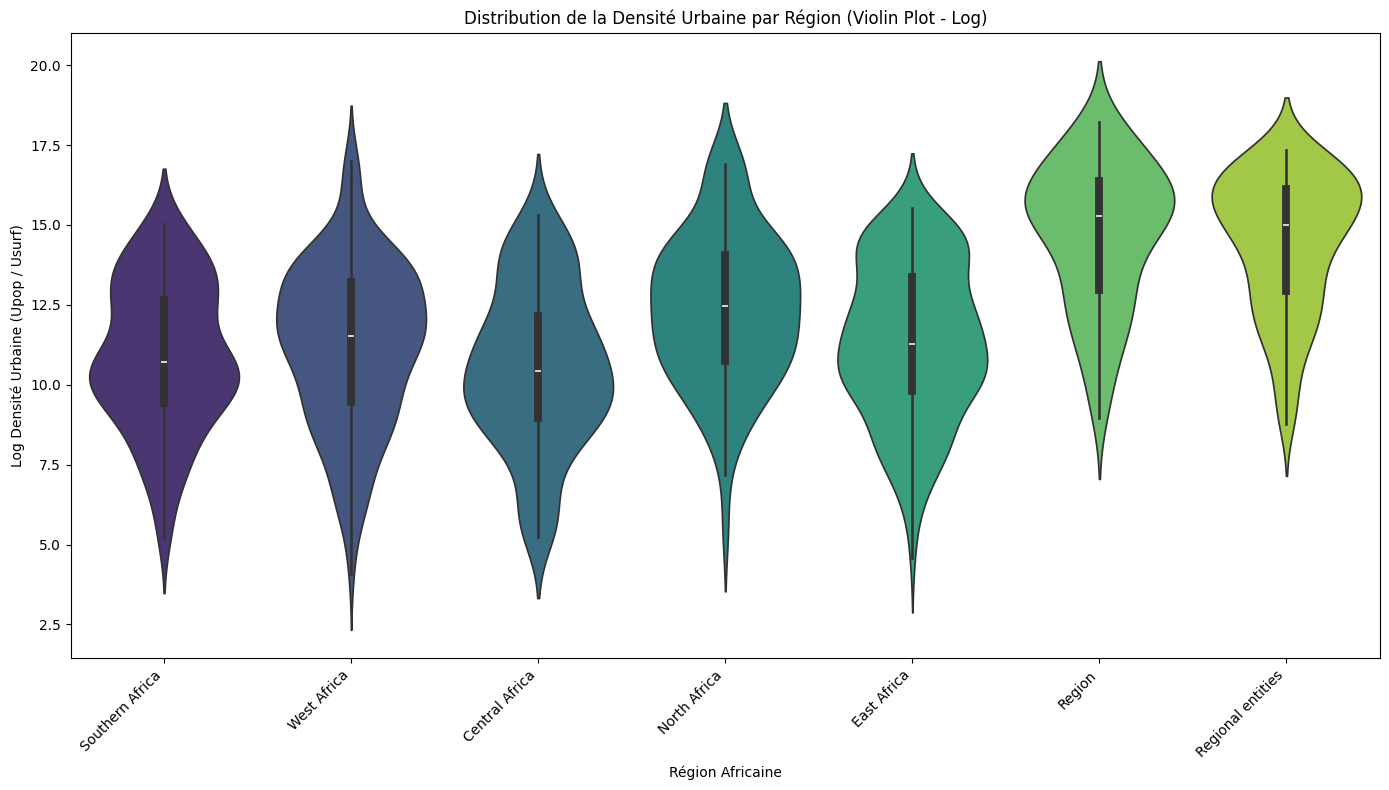

In [21]:
# Maintenant nous reprenons les visualisations après imputation des données manquantes
# Distribution de la densité urbaine (Log)
plt.figure(figsize=(10, 6))
sns.histplot(data_melted['Log_Densite'], kde=True)
plt.title('Distribution de la Densité Urbaine (Log)')
plt.xlabel('Log Densité Urbaine')
plt.show()

# Box Plot de la densité urbaine (Log)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_melted['Log_Densite'])
plt.title('Box Plot de la Densité Urbaine (Log)')
plt.show()

# Violin Plot de la densité urbaine par région (Log)
plt.figure(figsize=(14, 8))
sns.violinplot(x='AU_Regions', y='Log_Densite', data=data_melted, palette='viridis')
plt.title('Distribution de la Densité Urbaine par Région (Violin Plot - Log)')
plt.xlabel('Région Africaine')
plt.ylabel('Log Densité Urbaine (Upop / Usurf)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Les visualisations montrent que la transformation logarithmique et les méthodes d'imputations ont été très efficace pour réduire l'asymétrie et l'impact des valeurs aberrantes dans les données de densité urbaine. Après la transformation, nous maintenant comparer plus facilement les densités urbaines entre les régions et d'explorer les déterminants qui pourraient expliquer les différences observées.  

Statistiques descriptives par région:
                    count       mean       std       min        25%        50%  \
AU_Regions                                                                      
Central Africa     124.0  10.537545  2.506090  5.235719   8.950545  10.425142   
East Africa        181.0  11.317613  2.429267  4.594297   9.799403  11.280442   
North Africa        88.0  12.363615  2.340091  5.448056  10.730319  12.472854   
Region              75.0  14.697428  2.264820  8.962484  12.953205  15.283719   
Regional entities  135.0  14.437095  2.179934  8.782761  12.933949  14.982982   
Southern Africa    142.0  10.899701  2.317917  5.201274   9.431468  10.713752   
West Africa        216.0  11.242522  2.543143  4.065740   9.447474  11.529878   

                         75%        max  
AU_Regions                               
Central Africa     12.144889  15.308380  
East Africa        13.361044  15.522881  
North Africa       14.072976  16.905353  
Region             16

<ipython-input-22-e8cc746775fd>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AU_Regions', y='Log_Densite', data=data_melted, palette='viridis')


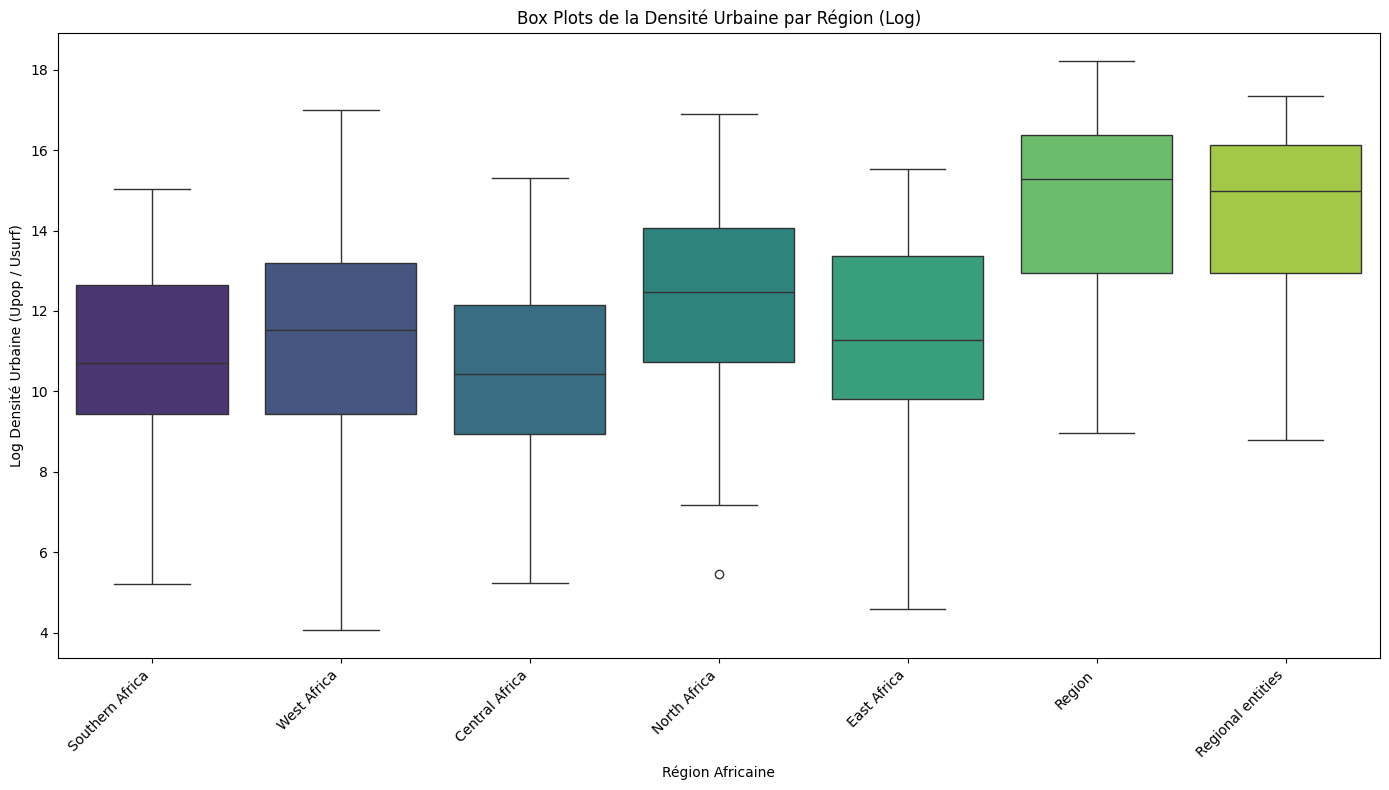

In [22]:
#Maintenant nous pouvons passer aux statistiques descriptives
# Statistiques descriptives par région
stats_descriptives = data_melted.groupby('AU_Regions')['Log_Densite'].describe()
print("Statistiques descriptives par région:\n", stats_descriptives)

# Test de Kruskal-Wallis
# Préparation des données pour le test
regions = data_melted['AU_Regions'].unique()
data_par_region = [data_melted['Log_Densite'][data_melted['AU_Regions'] == region] for region in regions]

# Test de Kruskal-Wallis
stat, p = kruskal(*data_par_region)
print("\nTest de Kruskal-Wallis:")
print('Statistic=%.3f, p=%.3f' % (stat, p))

# Interprétation du résultat
alpha = 0.05
if p > alpha:
    print('Les distributions sont similaires (ne pas rejeter H0)')
else:
    print('Les distributions sont significativement différentes (rejeter H0)')

#Si p > alpha, on ne rejette pas l'hypothèse nulle, ce qui signifie qu'on ne peu
# pas conclure qu'il existe des différences significatives
#entre les distributions de densité urbaine des différentes régions.

#Si p <= alpha. Dans ce cas, on rejette l'hypothèse nulle, car il existe des
#différences significatives entre les distributions
# de densité urbaine des différentes régions.


# Box plots par région
plt.figure(figsize=(14, 8))
sns.boxplot(x='AU_Regions', y='Log_Densite', data=data_melted, palette='viridis')
plt.title('Box Plots de la Densité Urbaine par Région (Log)')
plt.xlabel('Région Africaine')
plt.ylabel('Log Densité Urbaine (Upop / Usurf)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
#Passons aux cartes inter actives maintenant:
!pip install plotly geopandas

In [24]:
import pandas as pd
import geopandas as gpd
import plotly.express as px


In [25]:
fig = px.scatter_geo(data_melted,
                     locations="ISO",
                     color="AU_Regions",
                     hover_name="Country",
                     size="Log_Densite",
                     animation_frame="Year",
                     scope="africa",
                     projection="natural earth",
                     title=" Évolution de la Densité Urbaine en Afrique (2015-2050)")
fig.show()

In [26]:
country_list = data_melted['Country'].unique()
for country in country_list:
    print(country)

Angola
Benin
Burkina Faso
Cote d`Ivoire
Cameroon
Democratic Republic of the Congo
Republic of the Congo
Algeria
Egypt
Eritrea
Ethiopia
Ghana
Guinea
Equatorial Guinea
Kenya
Libya
Morocco
Madagascar
Mali
Mozambique
Niger
Nigeria
Sudan
Senegal
Sierra Leone
Somalia
Chad
Tunisia
Tanzania
Uganda
South Africa
Zambia
Zimbabwe
Central Africa
East Africa
Southern Africa
West Africa
Africa
Arab Maghreb Union
Common Market of Eastern and Southern Africa
Community of Sahel-Saharan States
East African Community
Economic Community of Central African States
Economic Community of West African States
Intergovernmental Authority on Development
Southern African Development Community
West African Economic and Monetary Union
Central African Republic
Cabo Verde
Gabon
Mauritius
Malawi
Namibia
South Sudan
Togo
Botswana
The Gambia
Liberia
Lesotho
Mauritania
Kingdom of Eswatini
Burundi
Comoros
Guinea-Bissau
Rwanda
Djibouti
Sao Tome and Principe


In [27]:
africa_geo = gpd.read_file('sample_data/custom.geo.json')

In [28]:
# Transformation des codes ISO pour avoir des codes  de type chaîne de caractères
data_melted['ISO'] = data_melted['ISO'].astype(str)
africa_geo['adm0_a3'] = africa_geo['adm0_a3'].astype(str)

In [29]:
print("Colonnes dans data:", data_melted_filtered.columns)
print("Colonnes dans africa_geo:", africa_geo.columns)

Colonnes dans data: Index(['ISO', 'Country', 'AU_Regions', 'Area', 'Year', 'Upop', 'Usurf'], dtype='object')
Colonnes dans africa_geo: Index(['featurecla', 'scalerank', 'labelrank', 'sovereignt', 'sov_a3',
       'adm0_dif', 'level', 'type', 'tlc', 'admin',
       ...
       'fclass_id', 'fclass_pl', 'fclass_gr', 'fclass_it', 'fclass_nl',
       'fclass_se', 'fclass_bd', 'fclass_ua', 'filename', 'geometry'],
      dtype='object', length=170)


In [30]:
# Nous préparons la base de donnée en selectionnant d'abord les colonnes à conserver dans africa_geo
africa_geo = africa_geo[['adm0_a3', 'geometry', 'admin']]

print("Colonnes dans africa_geo avant la fusion:", africa_geo.columns)

# Fusion des données en utilisant le code ISO
africa_geo = africa_geo.merge(data, left_on='adm0_a3', right_on='ISO', how='left', indicator=False)

Colonnes dans africa_geo avant la fusion: Index(['adm0_a3', 'geometry', 'admin'], dtype='object')


In [31]:
print("Colonnes dans africa_geo après la fusion:", africa_geo.columns)

Colonnes dans africa_geo après la fusion: Index(['adm0_a3', 'geometry', 'admin', 'ISO', 'Country', 'Country_FR',
       'AU_Regions', 'Area', 'Upop1950', 'Upop1960',
       ...
       'ADBA2010', 'ADBA2015', 'ADBA2020', 'ADBA2025', 'ADBA2030', 'ADBA2035',
       'ADBA2040', 'ADBA2045', 'ADBA2050', 'Log_Densite'],
      dtype='object', length=107)


In [32]:
#Pour être sur que notre fusion n'a pas laisser de colonne importante en déhors
#la base de donnée, nous procédons aux vérifications avant et après
print("Vérification avant la fusion :")
print("Colonnes dans data:", data_melted.columns)
print("Log_Densite est-il présent dans data?", 'Log_Densite' in data_melted.columns)
if 'Log_Densite' in data_melted.columns:
    print("Quelques valeurs de Log_Densite:", data_melted['Log_Densite'].head())

Vérification avant la fusion :
Colonnes dans data: Index(['ISO', 'Country', 'AU_Regions', 'Area', 'Year', 'Upop', 'Usurf',
       'Densité_Urbain', 'Log_Densite'],
      dtype='object')
Log_Densite est-il présent dans data? True
Quelques valeurs de Log_Densite: 0    7.084308
2    7.610449
3    6.430852
6    6.239473
7    8.218700
Name: Log_Densite, dtype: float64


In [33]:
# Nous allons filtrer la base pour ne conserver que les pays présents dans le GeoJSON
pays_dans_geojson = africa_geo['adm0_a3'].unique()
data = data_melted[data_melted['ISO'].isin(pays_dans_geojson)]

# Vérifions maintenant que Log_Densite est toujours présent après le filtrage
print("\nVérification après le filtrage :")
print("Colonnes dans data:", data_melted.columns)
print("Log_Densite est-il présent dans data?", 'Log_Densite' in data.columns)

# Il est important de préciser les colonnes à conserver dans africa_geo
africa_geo = africa_geo[['adm0_a3', 'geometry', 'admin']]

# Fusion des données en utilisant le code ISO
africa_geo = africa_geo.merge(data, left_on='adm0_a3', right_on='ISO', how='left', indicator=False)

#  Vérification des colonnes après la fusion
print("\nVérification après la fusion :")
print("Colonnes dans africa_geo après la fusion:", africa_geo.columns)
print("Log_Densite est-il présent dans africa_geo?", 'Log_Densite' in africa_geo.columns)



Vérification après le filtrage :
Colonnes dans data: Index(['ISO', 'Country', 'AU_Regions', 'Area', 'Year', 'Upop', 'Usurf',
       'Densité_Urbain', 'Log_Densite'],
      dtype='object')
Log_Densite est-il présent dans data? True

Vérification après la fusion :
Colonnes dans africa_geo après la fusion: Index(['adm0_a3', 'geometry', 'admin', 'ISO', 'Country', 'AU_Regions', 'Area',
       'Year', 'Upop', 'Usurf', 'Densité_Urbain', 'Log_Densite'],
      dtype='object')
Log_Densite est-il présent dans africa_geo? True


In [34]:
#Maintenant on peut procéder aux visualisations
# Création de la carte choroplèthe
fig = px.choropleth(africa_geo,
                    geojson=africa_geo.ISO,
                    locations='adm0_a3',
                    color='Log_Densite',
                    hover_name='admin',
                    title='Densité Urbaine en Afrique',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    projection="mercator")

fig.update_geos(fitbounds="locations", visible=False)
fig.show()


In [35]:
#Préparation des données pour la répresentation géospatiale
#Calcul des centroïdes (latitude et longitude)
crs_projected = 'EPSG:3857' #(il est important donc de définir les systèmes de référence des coordonées projetés)
africa_geo = africa_geo.to_crs(crs_projected)
africa_geo['centroid'] = africa_geo['geometry'].centroid
africa_geo['latitude'] = africa_geo['centroid'].y
africa_geo['longitude'] = africa_geo['centroid'].x

#Créeation du diagramme de dispersion 3D animée
fig = px.scatter_3d(africa_geo,
                    x='longitude',
                    y='latitude',
                    z='Log_Densite',
                    color='AU_Regions',
                    hover_name='admin',
                    animation_frame='Year',
                    title='Évolution de la densité urbaine en Afrique (3D)',
                    labels={'Log_Densite': 'Log(Densité Urbaine)'})

fig.update_layout(scene=dict(
        xaxis_title='Longitude',
        yaxis_title='Latitude',
        zaxis_title='Log(Densité Urbaine)',
    ))

fig.show()

In [37]:
# Définition le système de coordonnées projetées (EPSG:3857 est un choix
# courant que nous utilisons)
crs_projeted = 'EPSG:3857'

# Re-projeter les géométries
africa_geo = africa_geo.to_crs(crs_projeted)

In [38]:
# Nous créeons un diagramme de dispersion 3D
fig = px.scatter_3d(africa_geo,
                    x='longitude',
                    y='latitude',
                    z='Log_Densite',
                    color='AU_Regions',
                    hover_name='admin',
                    animation_frame='Year',
                    title='Évolution de la densité urbaine en Afrique (3D)',
                    labels={'Log_Densite': 'Log(Densité Urbaine)'})

# Amélioration de la mise en page
fig.update_layout(scene=dict(
    xaxis_title='Longitude',
    yaxis_title='Latitude',
    zaxis_title='Log(Densité Urbaine)',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    zaxis=dict(showgrid=False),
    bgcolor="rgb(230,230,230)"
))

fig.show()

In [39]:
 # Nous pouvons maintenant faire une visualisation de la carte 3D animée
fig = px.scatter_geo(africa_geo,
                     locations='adm0_a3',
                     hover_name='Country',
                     size='Log_Densite',
                     color='Log_Densite',
                     animation_frame='Year',
                     projection='natural earth',
                     title='Évolution de la densité urbaine en Afrique 1950-2050',
                     color_continuous_scale='hot',
                     size_max=10)

fig.update_layout(
    geo=dict(
        landcolor="black",
        oceancolor="LightSeaGreen",
        showocean=True,
        showlakes=True,
        lakecolor="LightBlue"
    ),
    paper_bgcolor="LightSeaGreen"
)

fig.show()

In [43]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Création de la trace pour la carte de l'Afrique
africa_map = go.Scattergeo(
    locationmode='ISO-3',
    locations=africa_geo['ISO'],
    text=africa_geo['Country'],
    mode='markers', # Modifier le mode à 'markers'
    marker=dict(
        size=1, # Définir la taille des marqueurs à 1 pour ne pas les afficher
        color='lightgray',
        line=dict(
            width=0.5,
            color='black'
        )
    ),
    showlegend=False
)

# Créetion de la figure avec sous-tracés
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scattergeo'}]])

# Précision de la carte de l'Afrique
fig.add_trace(africa_map)

# Définition des années seulement
years = sorted(africa_geo['Year'].unique())

# Nous pouvons maintenant créer les frames pour l'animation
frames = []
for year in years:
    year_data = africa_geo[africa_geo['Year'] == year]
    frame = go.Frame(
        data=[
            go.Scattergeo(
                locationmode='ISO-3',
                locations=year_data['ISO'],
                text=year_data['Country'],
                marker=dict(
                    size=year_data['Log_Densite'] * 5,  # Ajuster le facteur multiplicatif pour la taille des barres
                    color=year_data['Log_Densite'],
                    colorscale='Viridis',
                    sizemode='diameter',
                    sizemin=0,
                    line=dict(
                        width=0, #(on peut ajuster cette taille comme on veut)
                        color='black'
                    )
                ),
                showlegend=False
            )
        ],
        name=str(year)
    )
    frames.append(frame)

# Maintenant il faut ajouter les frames à la figure avant la mise a jour
fig.frames = frames

# Mise à jour de la mise en page
fig.update_layout(
    title='Évolution de la densité urbaine en Afrique 1950 à 2050',
    geo=dict(
        scope='africa',
        projection_type='natural earth',
        showland=True,
        landcolor='lightgray',
        showocean=True,
        oceancolor='lightblue',
        lakecolor='lightblue'
    ),
    updatemenus=[{
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 500, "redraw": True},
                                "fromcurrent": True, "transition": {"duration": 300,
                                                                    "easing": "quadratic-in-out"}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": True},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }],
    sliders=[{
        "active": 0,
        "yanchor": "top",
        "xanchor": "left",
        "currentvalue": {
            "font": {"size": 20},
            "prefix": "Année:",
            "visible": True,
            "xanchor": "right"
        },
        "transition": {"duration": 300, "easing": "cubic-in-out"},
        "pad": {"b": 10, "t": 50},
        "len": 0.9,
        "x": 0.1,
        "y": 0,
        "steps": [
            {
                "args": [[f.name], {"frame": {"duration": 300, "redraw": True},
                                    "mode": "immediate",
                                    "transition": {"duration": 300}}],
                "label": f.name,
                "method": "animate"
            } for f in fig.frames
        ]
    }]
)

fig.show()


In [44]:
#Nous essayons ici de faire une répresentation de la carte 3D avec animation des
# barres qui indiquent l'évolution de la densité urbaine
import plotly.graph_objects as go
import numpy as np

data = africa_geo.copy() #(pour ne pas endomamger la base de données nous créons une copie)
data['Log_Densite'] = np.random.rand(len(data)) * 10
data['Year'] = np.random.choice(range(2000, 2021), size=len(data))

# Définition des années uniques
years = sorted(data['Year'].unique())

# Créeation des frames pour l'animation
frames = []
for year in years:
    year_data = data[data['Year'] == year]
    frame = go.Frame(
        data=[
            go.Bar(
                x=year_data['longitude'],
                y=year_data['latitude'],
                marker=dict(color=year_data['Log_Densite'], colorscale='Viridis'),
                width=0.05  #largeur des barres
            )
        ],
        name=str(year)
    )
    frames.append(frame)

# Création de la figure initiale
fig = go.Figure(
    data=[
        go.Bar(
            x=data[data['Year'] == years[0]]['longitude'],
            y=data[data['Year'] == years[0]]['latitude'],
            marker=dict(color=data[data['Year'] == years[0]]['Log_Densite'], colorscale='Viridis'),
            width=0.05  # Ajuster la largeur des barres
        )
    ],
    layout=go.Layout(
        title='Évolution de la densité urbaine en Afrique',
        scene=dict(
            xaxis_title='Longitude',
            yaxis_title='Latitude',
            zaxis_title='Log(Densité Urbaine)',
            xaxis=dict(showgrid=False, zeroline=False),
            yaxis=dict(showgrid=False, zeroline=False),
            zaxis=dict(showgrid=False, zeroline=False),
            bgcolor="rgb(230,230,230)",
            camera=dict(
                eye=dict(x=1.25, y=1.25, z=1.25)
            ),
            aspectratio=dict(x=1, y=1, z=0.8),
        ),
        updatemenus=[{
            "type": "buttons",
            "buttons": [{
                "args": [None, {"frame": {"duration": 500, "redraw": True},
                                "fromcurrent": True, "transition": {"duration": 300,
                                                                    "easing": "quadratic-in-out"}}],
                "label": "Play",
                "method": "animate"
            }],
            "direction": "left",
            "pad": {"r": 10, "t": 87},
            "showactive": False,
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top"
        }],
        sliders=[{
            "active": 0,
            "yanchor": "top",
            "xanchor": "left",
            "currentvalue": {
                "font": {"size": 20},
                "prefix": "Année:",
                "visible": True,
                "xanchor": "right"
            },
            "transition": {"duration": 300, "easing": "cubic-in-out"},
            "pad": {"b": 10, "t": 50},
            "len": 0.9,
            "x": 0.1,
            "y": 0,
            "steps": [
                {
                    "args": [[f.name], {"frame": {"duration": 300, "redraw": True},
                                        "mode": "immediate",
                                        "transition": {"duration": 300}}],
                    "label": f.name,
                    "method": "animate"
                } for f in fig.frames
            ]
        }]
    ),
    frames=frames
)

fig.show()


In [54]:

#Maintenant essayons de faire des diagramme en ligne

# Transformation de la base avec la fonction Melt
data_melted = pd.melt(data,
                       id_vars=['ISO', 'Country', 'AU_Regions', 'Area', 'Year'],
                       value_vars=['Upop', 'Usurf'],
                       var_name='Variable',
                       value_name='Value')

# Normalisation des données avec la fonction lambda
data_melted['Value_Normalized'] = data_melted.groupby('Variable')['Value'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

# Tri des données par 'Variable' et 'Year' pour assurer un tracé correct des lignes
data_melted = data_melted.sort_values(by=['Variable', 'Year'])

# Créer le diagramme en ligne avec plotly.express
fig = px.line(data_melted, x="Year", y="Value_Normalized", color="Variable",
              title="Evolution de Upop et Usurf de 2000 à 2020 (données normalisées)",
              labels={"Value_Normalized": "Valeur normalisée (0-1)", "Variable": "Série"})

fig.update_layout(yaxis_title="échelle normalisée (0-1)")
fig.show()


La disposition du graphique souligne qu'il ya encore des problèmes de donnees dans la base. Nous allons verifier et gerer cela.
Nous allons également utiliser un seul ID car précédemment, nous avions un ID_var avec plusieurs variables et cela signifie que chaque combinaison unique de ces colonnes est traitée comme une série distincte. Nous allons agréger donc les données pour chaque année.

Par ailleurs, sachant que Usurf est en milliers de kilomètres carrés et Upop est en nombre d'habitants, cela veut dire que les échelles sont très différentes. L'utilisation d'une échelle logarithmique ou de graphiques séparés pourrait être une bonne solution, mais comme nous souhaitons les visualiser sur le même graphique, la normalisation des données est la meilleure approche.

In [67]:
# Transformation de la base avec la fonction Melt
data_melted = pd.melt(data,
                       id_vars=['Year'],
                       value_vars=['Upop', 'Usurf'],
                       var_name='Variable',
                       value_name='Value')

# Normalisation des données avec la fonction lambda
data_melted['Value_Normalized'] = data_melted.groupby('Variable')['Value'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

# Tri des données par 'Variable' et 'Year' pour assurer un tracé correct des lignes
data_melted = data_melted.sort_values(by=['Variable', 'Year'])

# Création du diagramme en ligne avec plotly.express
fig = px.line(data_melted, x="Year", y="Value_Normalized", color="Variable",
              title="Evolution de Upop et Usurf de 1950 à 2040 (données normalisées)",
              labels={"Value_Normalized": "Valeur normalisée (0-1)", "Variable": "Série"})

fig.update_layout(yaxis_title="échelle normalisée (0-1)")
fig.show()


In [66]:
print(data_melted.isnull().sum())

Year                0
Variable            0
Value               0
Value_Normalized    0
dtype: int64


Le problème n'est donc pas lié aux donnees manquantes car il n'en existe pas que nous avons géré.

In [64]:
# Traitement des valeurs manquantes par interpolation
data_melted['Value'] = data_melted['Value'].interpolate()
data_melted['Value_Normalized'] = data_melted['Value_Normalized'].interpolate()

In [65]:
# Créer le diagramme en ligne avec plotly.express
fig = px.line(data_melted, x="Year", y="Value_Normalized", color="Variable",
              title="Evolution de Upop et Usurf de 1950 à 2040 (données normalisées)",
              labels={"Value_Normalized": "Valeur normalisée (0-1)", "Variable": "Série"})

fig.update_layout(yaxis_title="échelle normalisée (0-1)")
fig.show()

In [68]:
print(data_melted.groupby(['Year', 'Variable']).size())


Year  Variable
2000  Upop        42
      Usurf       42
2001  Upop        29
      Usurf       29
2002  Upop        24
      Usurf       24
2003  Upop        31
      Usurf       31
2004  Upop        32
      Usurf       32
2005  Upop        31
      Usurf       31
2006  Upop        38
      Usurf       38
2007  Upop        35
      Usurf       35
2008  Upop        37
      Usurf       37
2009  Upop        38
      Usurf       38
2010  Upop        40
      Usurf       40
2011  Upop        34
      Usurf       34
2012  Upop        21
      Usurf       21
2013  Upop        29
      Usurf       29
2014  Upop        30
      Usurf       30
2015  Upop        39
      Usurf       39
2016  Upop        24
      Usurf       24
2017  Upop        40
      Usurf       40
2018  Upop        41
      Usurf       41
2019  Upop        23
      Usurf       23
2020  Upop        33
      Usurf       33
dtype: int64


Le problème que nous rencontrons est que nous avons plusieurs entrées pour chaque année ( une pour chaque pays et région), ce qui explique pourquoi le graphique montre des lignes discontinues.

Pour résoudre ce problème, nous allons agréger les données pour chaque année avant de les tracer.  

In [69]:
# Agrégation des données par année et variable
data_aggregated = data_melted.groupby(['Year', 'Variable'])['Value'].sum().reset_index()

# Normalisation des données avec la fonction lambda
data_aggregated['Value_Normalized'] = data_aggregated.groupby('Variable')['Value'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

# Créer le diagramme en ligne avec plotly.express
fig = px.line(data_aggregated, x="Year", y="Value_Normalized", color="Variable",
              title="Evolution de Upop et Usurf (données normalisées et agrégées)",
              labels={"Value_Normalized": "Valeur normalisée (0-1)", "Variable": "Série"})

fig.update_layout(yaxis_title="Échelle normalisée (0-1)")
fig.show()


Le graphique montre maintenant des lignes continues, ce qui permet de comprendre que la methode d'agrégation et de normalisation ont été bien appliquées.
Cependant, les lignes présentent de nombreuses fluctuations avec des extremes (haut et bas) trop élevés. Pour faciliter l'interprétation des tendances générales, nous allons procéder aux étapes sivantes :

#le lissage des données, l'ajout d'une ligne de tendance,
# l'exploration d'autres méthodes de normalisation et la vérification des valeurs aberrantes potentielles.


In [71]:
# Création de la figure avec deux axes Y
fig = go.Figure()

# La trace pour Upop
fig.add_trace(go.Scatter(x=data_aggregated[data_aggregated['Variable'] == 'Upop']['Year'],
                         y=data_aggregated[data_aggregated['Variable'] == 'Upop']['Value'],
                         name='Upop',
                         yaxis='y1'))

#La trace pour Usurf
fig.add_trace(go.Scatter(x=data_aggregated[data_aggregated['Variable'] == 'Usurf']['Year'],
                         y=data_aggregated[data_aggregated['Variable'] == 'Usurf']['Value'],
                         name='Usurf',
                         yaxis='y2'))

#Mise en page avec deux axes Y
fig.update_layout(
    title='Evolution de Upop et Usurf',
    xaxis_title='Année',
    yaxis_title='Population Urbaine',
    yaxis2=dict(
        title='Surface Urbaine',
        overlaying='y',
        side='right'
    )
)

fig.show()


In [73]:
print(data_melted.columns)

Index(['Year', 'Variable', 'Value', 'Value_Normalized'], dtype='object')


In [74]:
heatmap_data = data.pivot_table(index='AU_Regions',
                                      columns='Year',
                                      values='Log_Densite',
                                      aggfunc='mean')  # You can change aggfunc if needed

In [76]:
# Appliquer une transformation logarithmique à la colonne 'Densite_Urbaine' en utilisant .loc
data['Log_Densite'] = np.log1p(data['Densité_Urbain'])

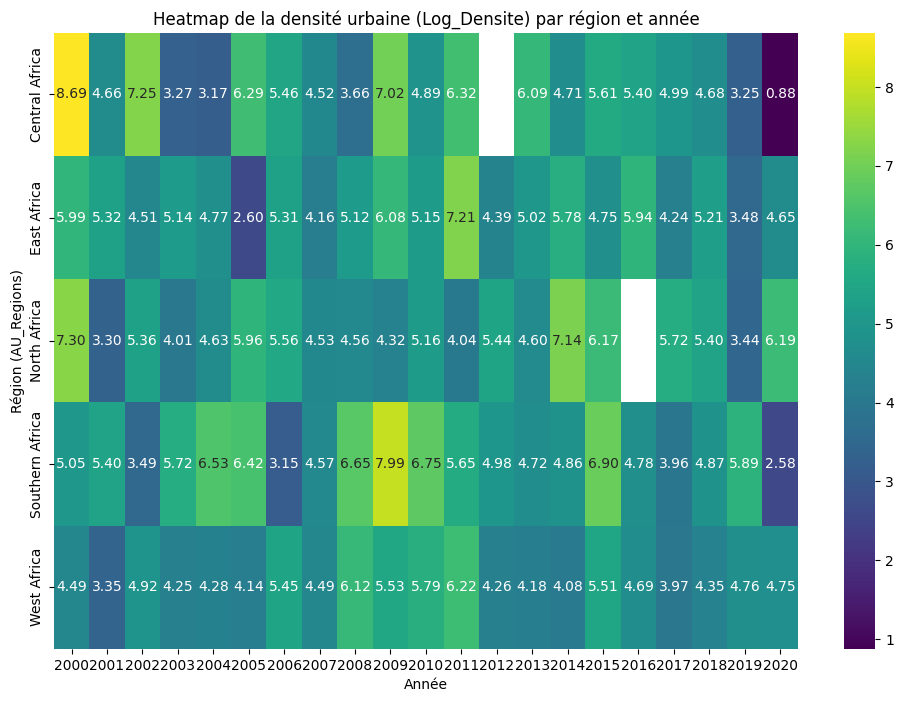

In [77]:
# Créer la heatmap avec Seaborn
plt.figure(figsize=(12, 8))  #
sns.heatmap(heatmap_data, cmap="viridis", annot=True, fmt=".2f")  # style et l'annotation

# Titres et les étiquettes
plt.title('Heatmap de la densité urbaine (Log_Densite) par région et année')
plt.xlabel('Année')
plt.ylabel('Région (AU_Regions)')


plt.show()

On constate que les données sont ,manquantes pour certaines régions en 2016, Nous allons utiliser la moyenne par region pour corriger et Ajuster les couleurs pour une meilleur lisibilité.

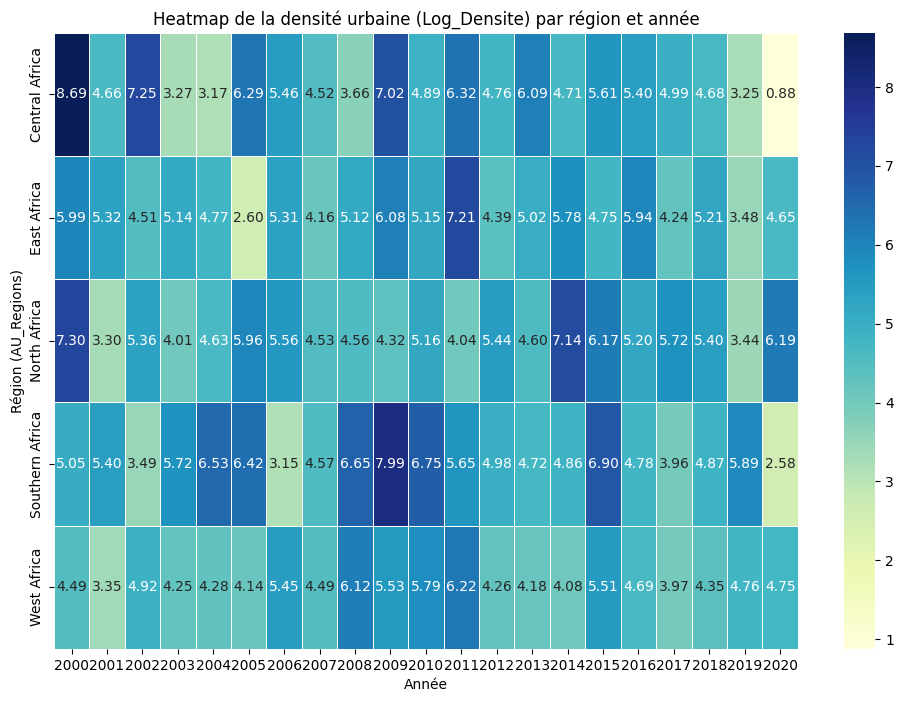

In [78]:
# Correction des valeurs manquantes par la moyenne de la région
heatmap_data = heatmap_data.fillna(heatmap_data.mean())

# Heatmap avec Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)

# Titres et étiquettes
plt.title('Heatmap de la densité urbaine (Log_Densite) par région et année')
plt.xlabel('Année')
plt.ylabel('Région (AU_Regions)')

plt.show()


Notre heatmap visualise la densité urbaine (Log_Densite) dans différentes régions d'Afrique (Afrique centrale, Afrique de l'Est, Afrique du Nord, Afrique australe et Afrique de l'Ouest) de 2000 à 2020.
Les couleurs représentent l'intensité de la densité urbaine. Une couleur plus foncée (bleu) indique une densité plus élevée et une couleurs plus claire (jaune) indique une densité plus faible.

#Afrique centrale : La densité urbaine en Afrique centrale est relativement élevée en 2000 et 2002, puis diminue considérablement et reste basse jusqu'en 2020, avec une chute importante.

#Afrique de l'Est : La densité urbaine en Afrique de l'Est fluctue au fil des ans, avec des pics en 2011 (7,21) et 2015.

#Afrique du Nord : La densité urbaine en Afrique du Nord est relativement stable, avec une augmentation notable à partir de 2014 (7,14).

#Afrique australe : La densité urbaine en Afrique australe montre une variabilité importante, avec des pics en 2004 (6,53), 2009 (7,99) et 2010, et une baisse significative en 2020 (2,58).  

#Afrique de l'Ouest : La densité urbaine en Afrique de l'Ouest est relativement stable et modérée tout au long de la période.